배송 시간을 예측하는 프로그램을 만들기 위해 사용할 수 있는 몇 가지 모델은 다음과 같습니다:

## 1. 선형 회귀 모델 (Linear Regression)
간단하고 직관적인 모델로, 독립 변수와 종속 변수 사이의 선형 관계를 기반으로 예측합니다.
장점: 해석이 쉽고 빠르며, 성능이 나쁘지 않은 경우가 많습니다.
단점: 데이터가 비선형일 경우 성능이 떨어질 수 있습니다.
## 2. 랜덤 포레스트 회귀 (Random Forest Regressor)
결정 트리의 앙상블 모델로, 여러 트리를 학습하여 평균 값을 예측하는 방식입니다.
장점: 높은 정확도와 비선형 데이터 처리 능력이 뛰어납니다.
단점: 학습 시간이 오래 걸릴 수 있습니다.
## 3. 그라디언트 부스팅 회귀 (Gradient Boosting Regressor)
여러 약한 학습기를 결합해 점진적으로 성능을 향상시키는 앙상블 모델입니다.
장점: 강력한 성능과 비선형 데이터 처리 능력을 보입니다.
단점: 과적합의 위험이 있을 수 있으며, 학습 시간이 오래 걸릴 수 있습니다.
## 4. XGBoost (Extreme Gradient Boosting)
Gradient Boosting의 고도화된 버전으로, 성능과 속도 모두 뛰어난 앙상블 모델입니다.
장점: 빠르고 강력한 성능을 보이며, 다양한 하이퍼파라미터 튜닝이 가능합니다.
단점: 메모리 사용량이 클 수 있습니다.
## 5. LightGBM (Light Gradient Boosting Machine)
XGBoost와 유사하지만 더 빠르게 학습할 수 있는 모델입니다.
장점: 대용량 데이터에서 빠르게 학습하고, 적은 메모리 사용량을 자랑합니다.
단점: 데이터 전처리에 더 신경 써야 합니다.
## 6. 서포트 벡터 머신 회귀 (Support Vector Regressor, SVR)
데이터 포인트와 결정 경계 사이의 마진을 최대화하여 예측하는 비선형 모델입니다.
장점: 고차원 데이터에서 강력한 성능을 보입니다.
단점: 대규모 데이터에서는 학습 시간이 오래 걸릴 수 있습니다.
## 7. 신경망 (Neural Network)
다층 퍼셉트론 등의 딥러닝 기반 모델로, 복잡한 패턴을 학습할 수 있습니다.
장점: 복잡한 관계를 잘 학습하고 비선형 데이터에서도 성능이 좋습니다.
단점: 학습에 시간이 오래 걸리며, 과적합의 위험이 있습니다.

### 선형회귀 모델 사용
- 피쳐값 : 비용, 카테고리, 도시, 상품 무게,길이,높이

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


df = pd.read_csv('mlstart.csv')

# 데이터 준비 (One-Hot Encoding으로 문자열 데이터를 숫자로 변환)

X = df[['shipping_charges','category','customer_city','product_weight_g','product_length_cm'\
        ,'product_height_cm','product_width_cm',]]


y = df['delivery_time_hours']  # 배송 시간 (종속 변수)

# 카테고리 데이터를 One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['category','customer_city'], drop_first=True)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 예측 값과 실제 값
y_pred = model.predict(X_test)

# 평가 지표 계산 (일반 소수 표기로 변환)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # 모델 점수

# 출력 (일반 소수 표기)
print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"R-squared Score (R^2): {r2:.4f}")  # 모델 점수


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('mlstart.csv')

# 데이터 준비 (One-Hot Encoding으로 문자열 데이터를 숫자로 변환)
X = df[['shipping_charges','category','customer_city','product_weight_g',
        'product_length_cm','product_height_cm','product_width_cm']]
y = df['delivery_time_hours']  # 배송 시간 (종속 변수)

# 카테고리 데이터를 One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['category','customer_city'], drop_first=True)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 출력 (일반 소수 표기)
print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"Mean Squared Error (MSE): {mse:.10f}")


### 랜덤 포레스트 회귀 모델 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

"""
랜덤 포레스트 모델을 사용하여 데이터를 학습시키고 평가하는 코드입니다.
"""

# 데이터 로드
df = pd.read_csv('mlstart.csv')

# 독립 변수와 종속 변수 정의
X = df[['shipping_charges', 'category', 'customer_city', 'product_weight_g', 
        'product_length_cm', 'product_height_cm', 'product_width_cm']]
y = df['delivery_time_hours']  # 배송 시간 (종속 변수)

# 카테고리 데이터를 One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['category', 'customer_city'], drop_first=True)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 출력
print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"Mean Squared Error (MSE): {mse:.10f}")



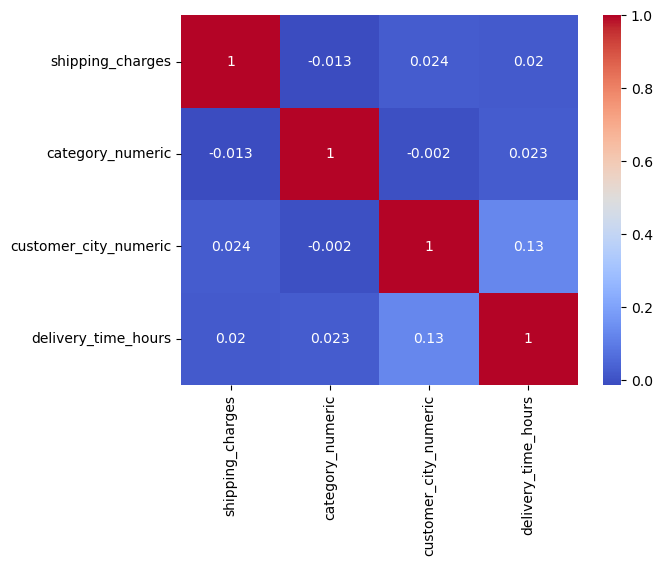

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('xxx.csv')

# 데이터프레임에서 수치형 변수만 선택
corr_matrix = df[[ 'shipping_charges','category_numeric','customer_city_numeric', 'delivery_time_hours']].corr()

# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



### 그라디언트 부스팅 모델 사용

### XG부스트 모델 사용

### 5. LightGBM (Light Gradient Boosting Machine)

### 6. 서포트 벡터 머신 회귀 (Support Vector Regressor, SVR)

### 7. 신경망 사용